# Importing all ncessary libraries required for Air Quality Dataset 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [2]:
air =pd.read_csv("C:\\Users\\91777\\Downloads\\city_hour.csv\\city_hour.csv")

In [3]:
air.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [4]:
air.dtypes

City           object
Datetime       object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [5]:
air.Datetime = pd.to_datetime(air.Datetime)

In [6]:
air.shape

(707875, 16)

In [7]:
air.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [8]:
air.describe()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,707875,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,2018-05-14 02:41:03.445098752,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
min,2015-01-01 01:00:00,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,2017-04-15 23:00:00,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,2018-08-04 20:00:00,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,2019-09-02 14:00:00,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,2020-07-01 00:00:00,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000
std,NaN,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729


**Let's look at the missing values**

In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = air.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * air.isnull().sum() / len(air)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(air.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(air)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,455829,64.400000
PM10,296737,41.900000
NH3,272542,38.500000
Toluene,220607,31.200000
Benzene,163646,23.100000
PM2.5,145088,20.500000
SO2,130373,18.400000
O3,129208,18.300000
AQI,129080,18.200000
AQI_Bucket,129080,18.200000


In [10]:
# Summary statistics
air.describe()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,707875,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,2018-05-14 02:41:03.445098752,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
min,2015-01-01 01:00:00,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,2017-04-15 23:00:00,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,2018-08-04 20:00:00,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,2019-09-02 14:00:00,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,2020-07-01 00:00:00,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000
std,NaN,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729


**Handling Missing Values**

In [11]:
df_filled = air.interpolate(inplace = True)   # Since sampling was done on daily basis and we have consistent data 


In [12]:
air.isnull().sum()

City               0
Datetime           0
PM2.5            665
PM10           38274
NO                 0
NO2                0
NOx                0
NH3            48192
CO                 0
SO2                0
O3                 3
Benzene            0
Toluene            0
Xylene             0
AQI              680
AQI_Bucket    129080
dtype: int64

In [13]:
# Fill missing values in 'AQI_Bucket' column with 'Moderate'
air['AQI_Bucket'].fillna(value='Moderate', inplace=True)

In [14]:
# Specify the list of parameters to fill
parameters = ['PM2.5', 'PM10', 'NH3', 'AQI', 'O3']

# Fill the specified parameters with the median of their values using .loc and inplace=True
air.loc[:, parameters] = air.loc[:, parameters].fillna(air[parameters].median())



In [15]:
air.set_index('Datetime', inplace=True)

# EDA 

In [16]:
# Summary statistics
air.describe()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000
mean,68.006878,95.637717,19.246069,26.768447,33.767550,21.783885,2.277933,18.506589,34.376377,3.575396,7.570758,3.628035,162.949017
std,77.746854,93.517278,34.098075,28.353189,40.391345,25.321478,10.866573,29.235524,29.575901,18.562654,21.257851,9.522860,155.225282
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,24.464790,39.210008,3.900000,9.910000,11.270000,8.640000,0.400000,4.980000,13.777548,0.050000,0.350000,0.144641,75.809962
50%,45.320000,70.618507,8.320000,17.970000,21.300000,14.250000,0.810000,8.880000,25.930000,0.894957,1.990000,1.325350,114.000000
75%,80.273250,117.430000,18.280000,33.740000,40.080000,27.610000,1.420000,16.820000,46.130000,2.850000,6.750000,5.380468,205.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


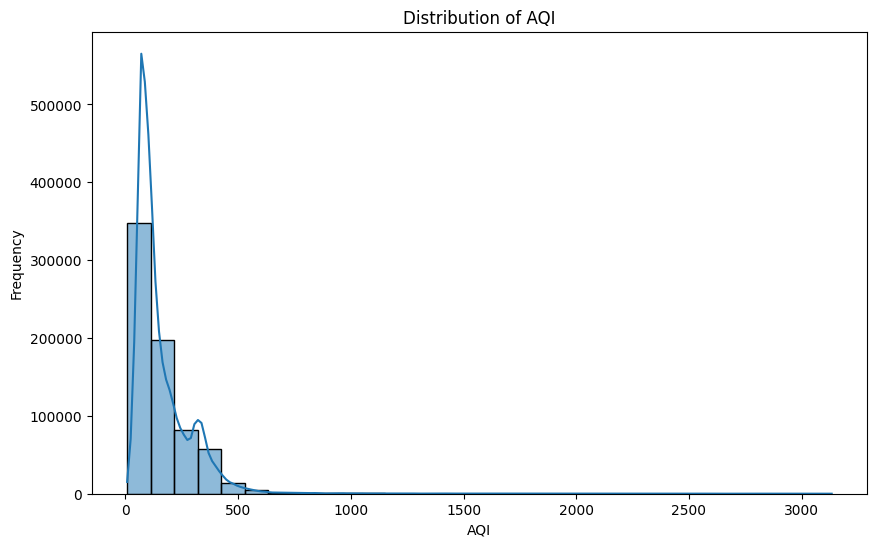

In [17]:
# Distribution of AQI
plt.figure(figsize=(10, 6))
sns.histplot(air['AQI'], bins=30, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


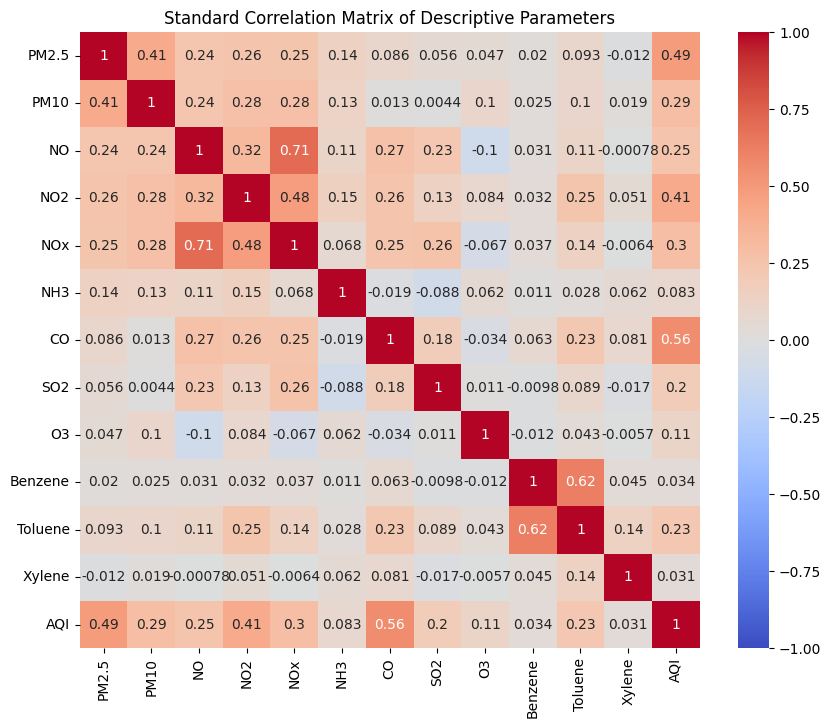

In [18]:
# correlation matrix
corr_matrix = air[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Standard Correlation Matrix of Descriptive Parameters')
plt.show()


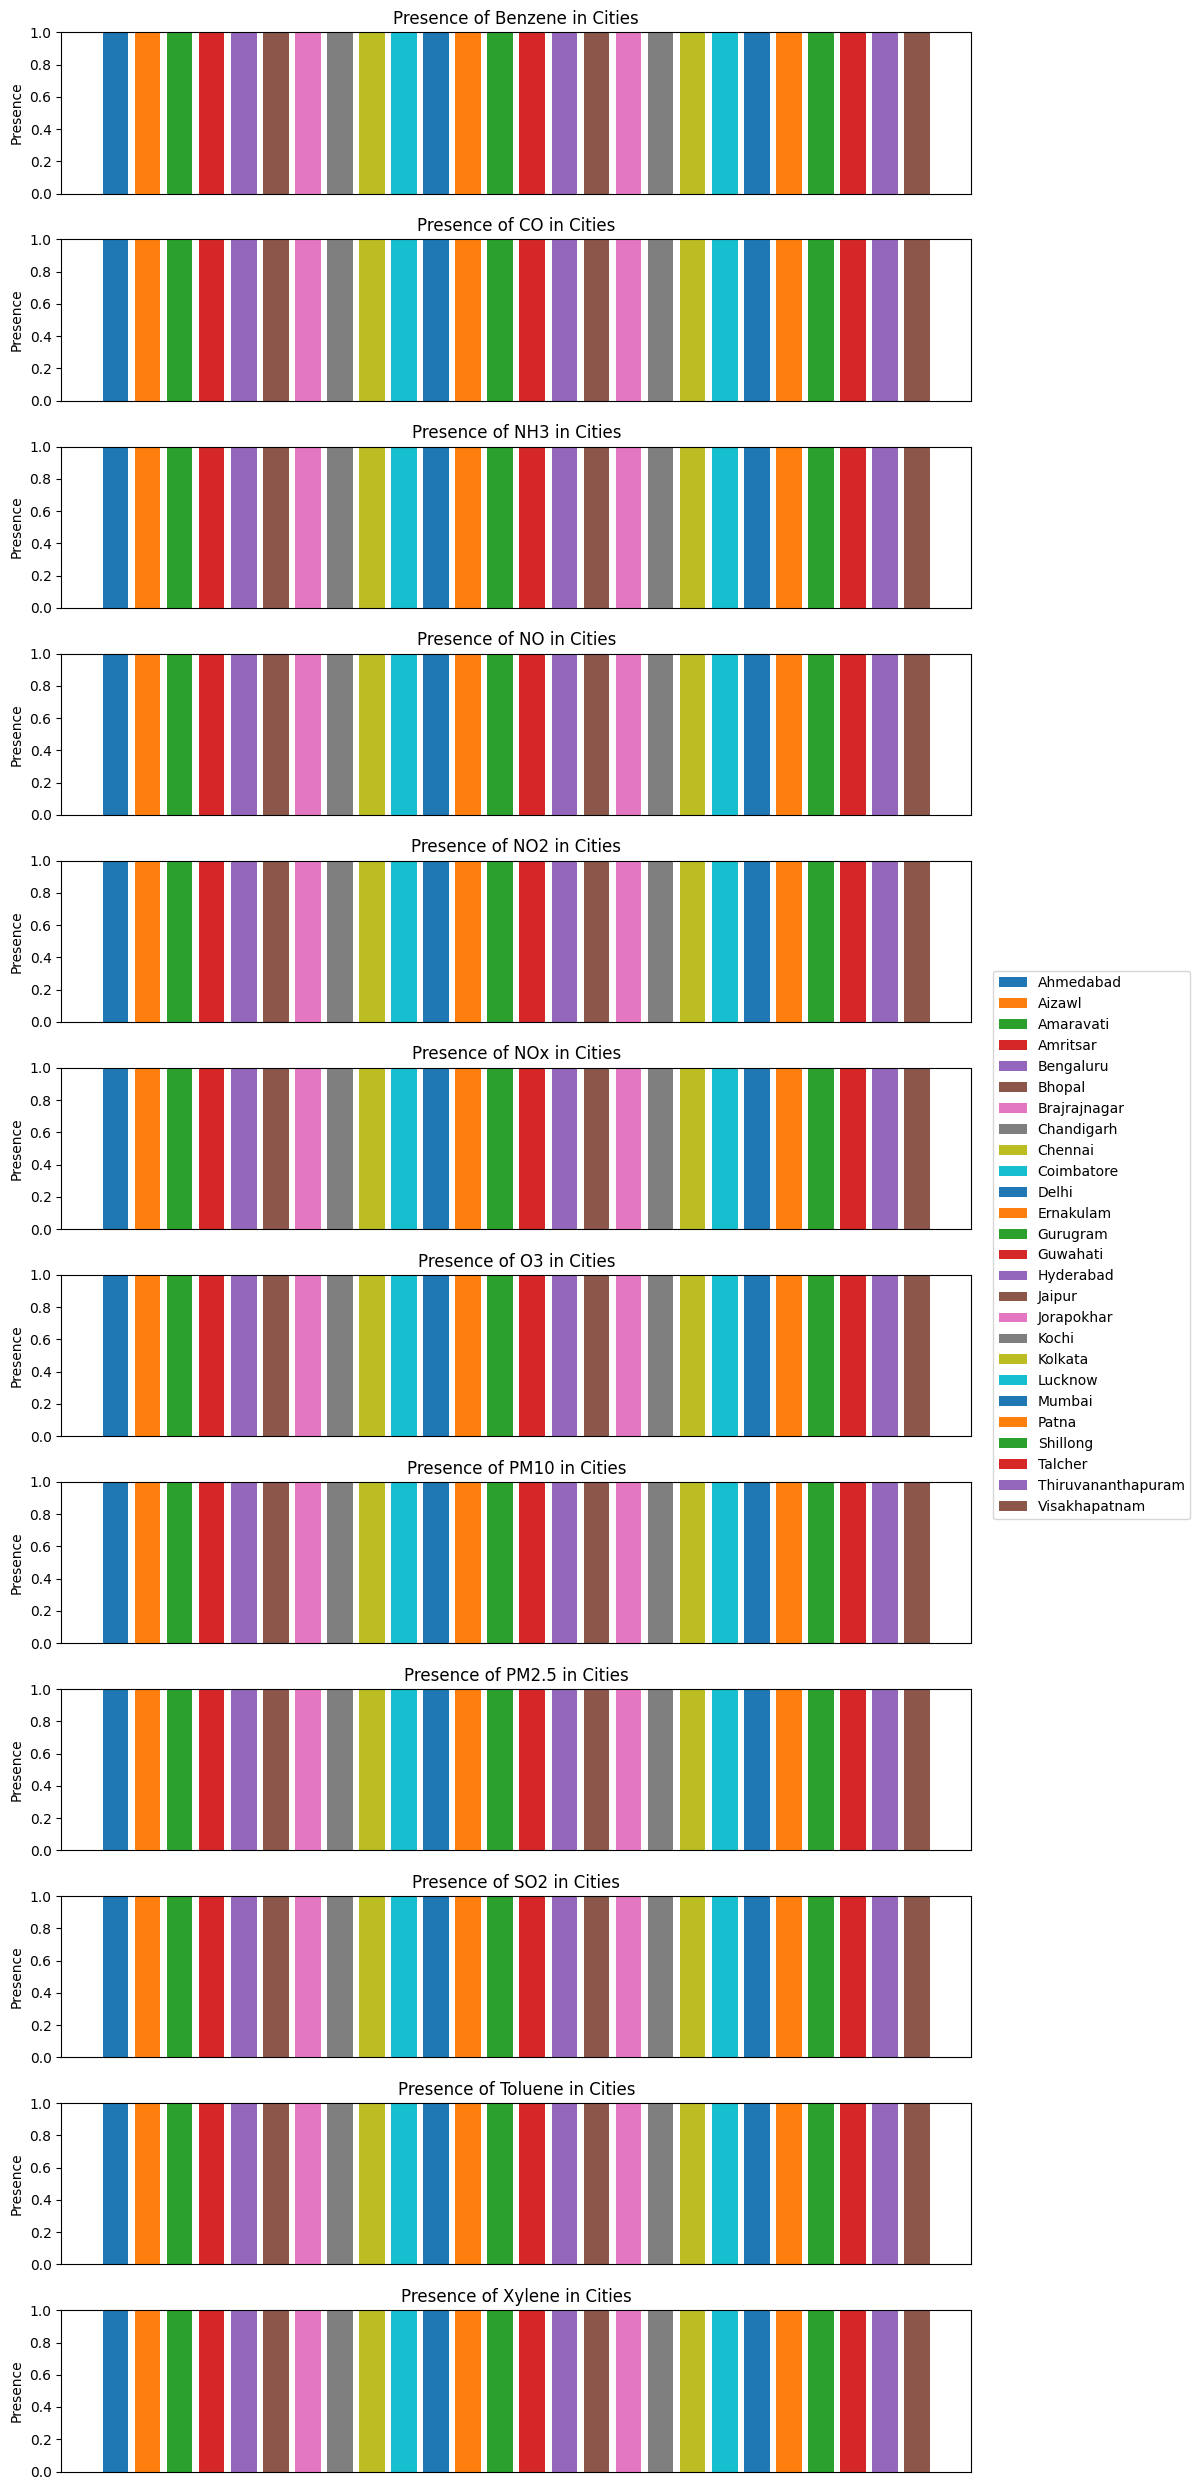

In [19]:
# Comaprison of Cities 
descriptive_params = air.columns.difference(['City', 'Datetime', 'AQI', 'AQI_Bucket'])

fig, axs = plt.subplots(len(descriptive_params), 1, figsize=(10, 25))  

for i, param in enumerate(descriptive_params):
    ax = axs[i]
    for city in air['City'].unique():
        city_data = air[air['City'] == city]
        presence = city_data[param].notnull().sum() / len(city_data)
        ax.bar(city, presence, label=city)

    ax.set_title(f'Presence of {param} in Cities')
    ax.set_ylabel('Presence')
    ax.set_ylim(0, 1)
    ax.set_xticks([])  
    
plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()



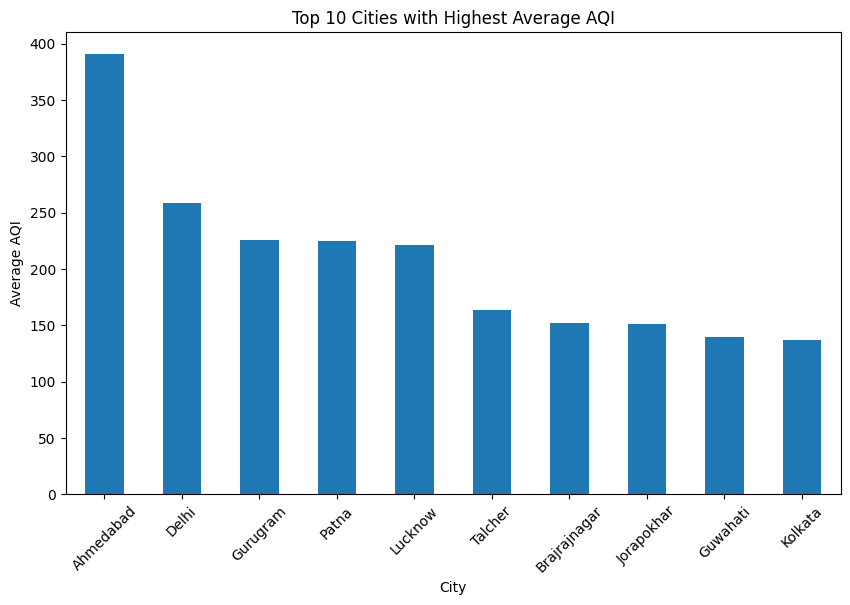

In [20]:
city_aqi = air.groupby('City')['AQI'].mean()

# Top 10 cities with highest average AQI
top_cities = city_aqi.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar')
plt.title('Top 10 Cities with Highest Average AQI')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.show()

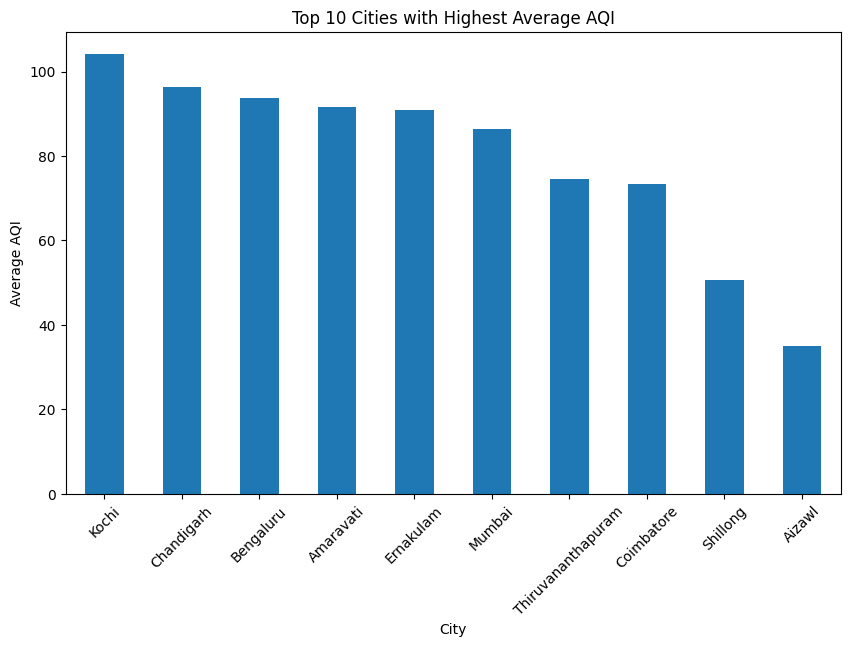

In [21]:
city_aqi = air.groupby('City')['AQI'].mean()

# Top 10 cities with lowest AQI
top_cities = city_aqi.sort_values(ascending=False).tail(10)

plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar')
plt.title('Top 10 Cities with Highest Average AQI')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.show()

# Temporal Analysis

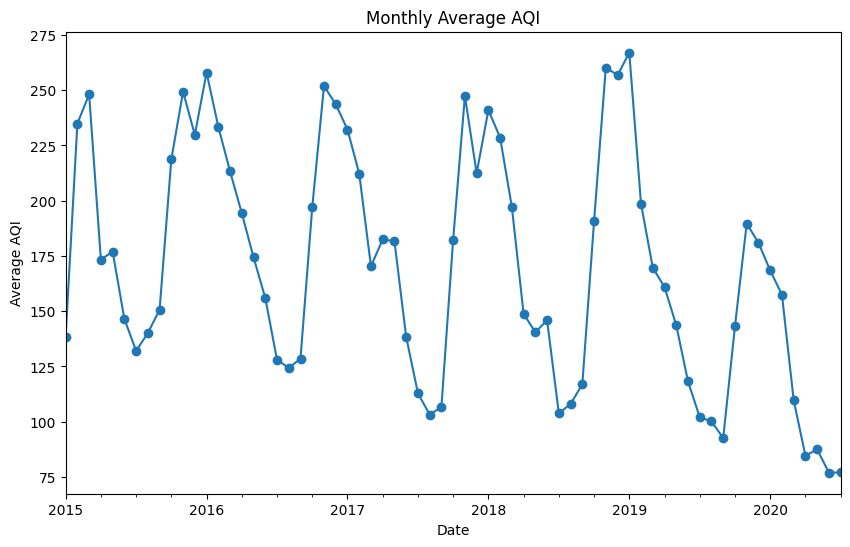

In [22]:
monthly_aqi = air['AQI'].resample('M').mean()
plt.figure(figsize=(10, 6))
monthly_aqi.plot(marker='o')
plt.title('Monthly Average AQI')
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.show()


**Trend in Top 10 Cities 📈⏳⏱️**

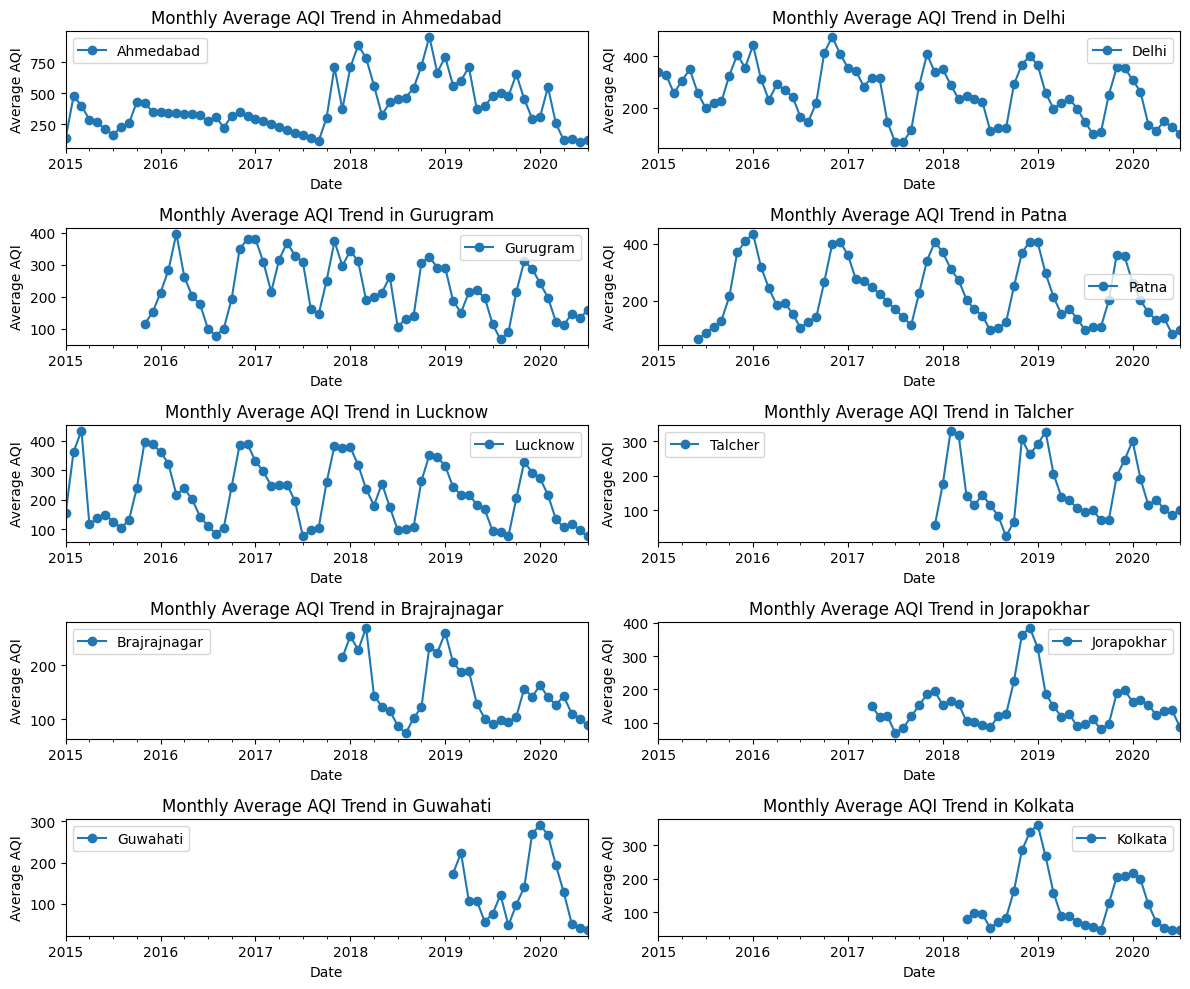

In [23]:
city_aqi = air.groupby('City')['AQI'].mean()

top_cities = city_aqi.sort_values(ascending=False).head(10).index

df_top_cities = air[air['City'].isin(top_cities)]


monthly_aqi = df_top_cities.groupby(['City', pd.Grouper(freq='M')])['AQI'].mean().unstack(level=0)

plt.figure(figsize=(12, 10))
for i, city in enumerate(top_cities, start=1):
    plt.subplot(5, 2, i)
    monthly_aqi[city].plot(marker='o', label=city, legend=True)
    plt.title(f'Monthly Average AQI Trend in {city}')
    plt.xlabel('Date')
    plt.ylabel('Average AQI')
    plt.legend()
plt.tight_layout()
plt.show()


**Pollution Trend**

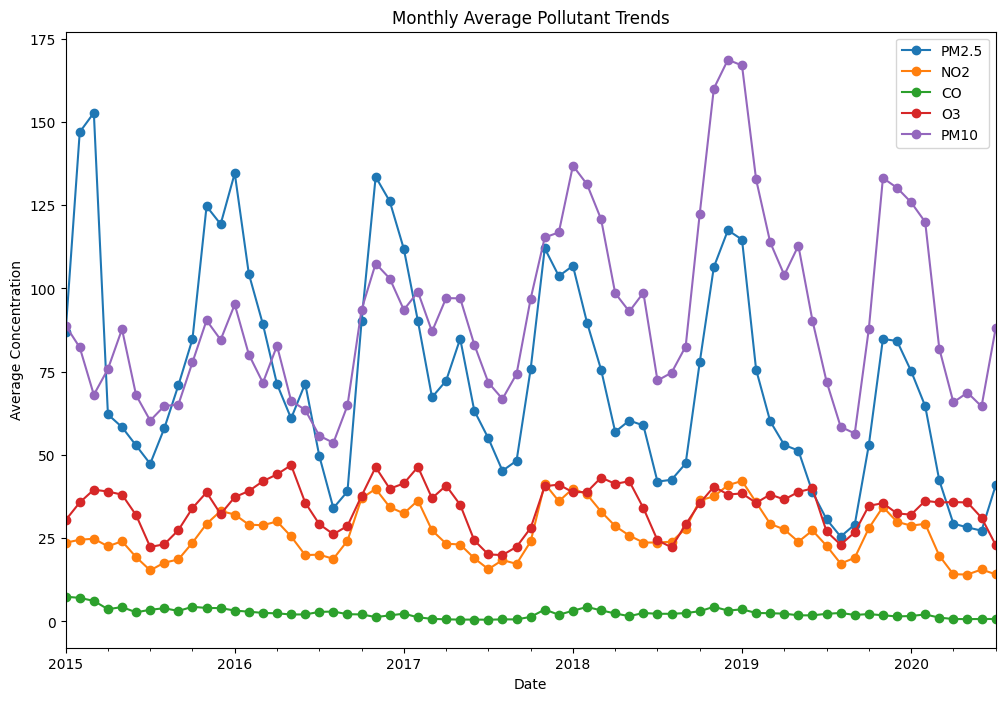

In [24]:
pollutants = ['PM2.5', 'NO2', 'CO', 'O3', 'PM10']
plt.figure(figsize=(12, 8))
for pollutant in pollutants:
    resampled_pollutant = air[pollutant].resample('M').mean()
    resampled_pollutant.plot(label=pollutant, marker='o')

plt.title('Monthly Average Pollutant Trends')
plt.xlabel('Date')
plt.ylabel('Average Concentration')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Create a sunburst chart
fig = px.sunburst(air, path=['City', 'PM2.5', 'NO2', 'CO', 'O3', 'SO2'],
                   values='AQI', title='Pollutant Distribution Across Cities')
fig.show()